In [4]:
from datetime import date
from nsepy import get_history
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import yfinance as yahooFinance

In [2]:
symbol="MRF.NS"
start=date(2012,1,1)
end=date(2023,3,1)

In [5]:
GetMRFInformation = yahooFinance.Ticker("MRF.NS")

In [6]:
df=GetMRFInformation.history(start=start,end=end)

In [9]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2012-01-02 00:00:00+05:30,6853.546410,6912.459416,6746.619399,6817.265625,4210,0.0,0.0
1,2012-01-03 00:00:00+05:30,6824.091319,7000.830375,6824.091319,6940.984375,12459,0.0,0.0
2,2012-01-04 00:00:00+05:30,6961.552941,6971.371774,6854.527656,6884.475098,3368,0.0,0.0
3,2012-01-05 00:00:00+05:30,6893.804138,6959.148294,6789.724485,6830.816406,15716,0.0,0.0
4,2012-01-06 00:00:00+05:30,6804.452441,6872.202400,6766.158985,6831.699707,2814,0.0,0.0
...,...,...,...,...,...,...,...,...
2749,2023-02-22 00:00:00+05:30,89958.000000,90000.000000,87500.000000,87658.296875,10970,0.0,0.0
2750,2023-02-23 00:00:00+05:30,87999.000000,88249.000000,86001.000000,86730.851562,10316,0.0,0.0
2751,2023-02-24 00:00:00+05:30,87350.000000,87462.000000,86650.000000,86800.703125,4732,0.0,0.0
2752,2023-02-27 00:00:00+05:30,86786.000000,86786.000000,84802.046875,85143.101562,7189,0.0,0.0


In [8]:
df.reset_index(inplace=True)

In [10]:
df['Date'] = df['Date'].dt.date

In [11]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2012-01-02,6853.546410,6912.459416,6746.619399,6817.265625,4210,0.0,0.0
1,2012-01-03,6824.091319,7000.830375,6824.091319,6940.984375,12459,0.0,0.0
2,2012-01-04,6961.552941,6971.371774,6854.527656,6884.475098,3368,0.0,0.0
3,2012-01-05,6893.804138,6959.148294,6789.724485,6830.816406,15716,0.0,0.0
4,2012-01-06,6804.452441,6872.202400,6766.158985,6831.699707,2814,0.0,0.0
...,...,...,...,...,...,...,...,...
2749,2023-02-22,89958.000000,90000.000000,87500.000000,87658.296875,10970,0.0,0.0
2750,2023-02-23,87999.000000,88249.000000,86001.000000,86730.851562,10316,0.0,0.0
2751,2023-02-24,87350.000000,87462.000000,86650.000000,86800.703125,4732,0.0,0.0
2752,2023-02-27,86786.000000,86786.000000,84802.046875,85143.101562,7189,0.0,0.0


In [12]:
df1=df.reset_index()['Close']

In [13]:
df1

0        6817.265625
1        6940.984375
2        6884.475098
3        6830.816406
4        6831.699707
            ...     
2749    87658.296875
2750    86730.851562
2751    86800.703125
2752    85143.101562
2753    85256.601562
Name: Close, Length: 2754, dtype: float64

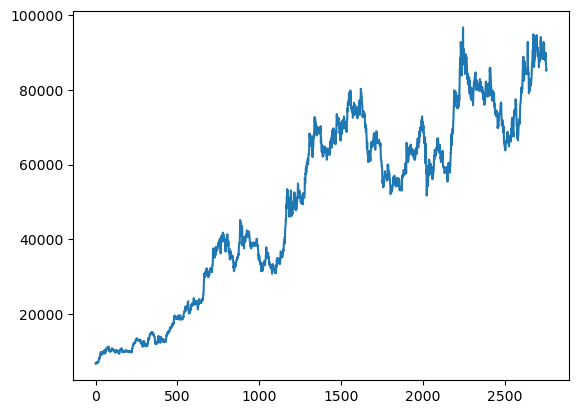

In [14]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [15]:
import numpy as np

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [17]:
print(df1)

[[0.00000000e+00]
 [1.37610952e-03]
 [7.47563284e-04]
 ...
 [8.89646635e-01]
 [8.71209323e-01]
 [8.72471770e-01]]


In [18]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [19]:
training_size,test_size

(1927, 827)

In [20]:
train_data

array([[0.        ],
       [0.00137611],
       [0.00074756],
       ...,
       [0.65150578],
       [0.64366532],
       [0.63784601]])

In [21]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [22]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 150
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [23]:
print(X_train.shape), print(y_train.shape)

(1776, 150)
(1776,)


(None, None)

In [24]:
print(X_test.shape), print(ytest.shape)

(676, 150)
(676,)


(None, None)

In [25]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [26]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout

In [27]:
model=Sequential()
model.add(LSTM(80,return_sequences=True,input_shape=(150,1)))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(30))
model.add(Dropout(0.2))
model.add(Dense(1))

adam = Adam(learning_rate= 0.01)
model.compile(loss='mean_squared_error',optimizer= adam)

In [28]:
X_train.shape[1]

150

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150, 80)           26240     
                                                                 
 dropout (Dropout)           (None, 150, 80)           0         
                                                                 
 lstm_1 (LSTM)               (None, 150, 50)           26200     
                                                                 
 dropout_1 (Dropout)         (None, 150, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 30)                9720      
                                                                 
 dropout_2 (Dropout)         (None, 30)                0         
                                                                 
 dense (Dense)               (None, 1)                 3

In [30]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=80,batch_size=70,verbose=1)

Epoch 1/80
26/26 [==============================] - 10s 257ms/step - loss: 0.0448 - val_loss: 0.0233
Epoch 2/80
26/26 [==============================] - 6s 222ms/step - loss: 0.0034 - val_loss: 9.6707e-04
Epoch 3/80
26/26 [==============================] - 6s 237ms/step - loss: 0.0026 - val_loss: 0.0016
Epoch 4/80
26/26 [==============================] - 6s 223ms/step - loss: 0.0023 - val_loss: 0.0012
Epoch 5/80
26/26 [==============================] - 5s 212ms/step - loss: 0.0021 - val_loss: 0.0013
Epoch 6/80
26/26 [==============================] - 6s 215ms/step - loss: 0.0021 - val_loss: 0.0023
Epoch 7/80
26/26 [==============================] - 6s 214ms/step - loss: 0.0018 - val_loss: 0.0014
Epoch 8/80
26/26 [==============================] - 6s 220ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 9/80
26/26 [==============================] - 6s 224ms/step - loss: 0.0016 - val_loss: 0.0020
Epoch 10/80
26/26 [==============================] - 6s 242ms/step - loss: 0.0016 - val_loss: 0

In [31]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

22/22 [==============================] - 1s 43ms/step


In [32]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [33]:
yTr=y_train.reshape(-1, 1)

In [34]:
y_Train=scaler.inverse_transform(yTr)

In [35]:
y_Train

array([[10341.80273438],
       [10545.73242188],
       [10519.63671875],
       ...,
       [64613.6328125 ],
       [65390.71484375],
       [64685.8203125 ]])

In [36]:
train_predict

array([[10187.122],
       [10393.179],
       [10543.053],
       ...,
       [65873.84 ],
       [66537.625],
       [67180.555]], dtype=float32)

In [37]:
yTe=ytest.reshape(-1,1)

In [38]:
y_Test=scaler.inverse_transform(yTe)

In [39]:
test_predict

array([[65281.145],
       [65128.863],
       [65083.074],
       [65105.92 ],
       [65122.75 ],
       [65541.36 ],
       [66129.9  ],
       [66438.59 ],
       [66552.74 ],
       [67016.734],
       [67416.05 ],
       [68017.4  ],
       [68302.27 ],
       [68255.13 ],
       [68108.27 ],
       [68347.195],
       [68740.26 ],
       [68598.5  ],
       [68031.69 ],
       [67389.57 ],
       [66969.336],
       [66773.35 ],
       [66521.91 ],
       [66161.33 ],
       [66274.445],
       [66710.64 ],
       [67230.69 ],
       [67262.664],
       [66635.25 ],
       [65766.86 ],
       [64936.47 ],
       [64479.69 ],
       [64303.51 ],
       [64042.938],
       [63665.23 ],
       [63317.707],
       [63203.055],
       [63346.23 ],
       [63517.844],
       [63886.637],
       [64126.965],
       [64033.348],
       [63799.04 ],
       [64211.367],
       [64491.67 ],
       [64001.906],
       [63096.94 ],
       [62324.34 ],
       [61925.21 ],
       [61866.79 ],


In [40]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

48363.67392202483

In [41]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

79104.80578657977

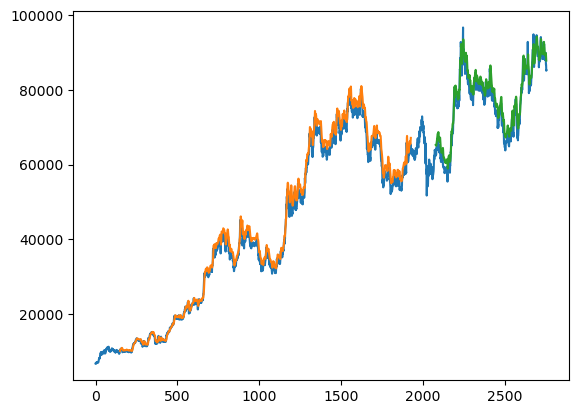

In [42]:
### Plotting 
# shift train predictions for plotting
look_back=150
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [43]:
len(test_data)

827

In [44]:
x_input=test_data[677:].reshape(1,-1)
x_input.shape

(1, 150)

In [45]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [46]:
temp_input

[0.8216040330888471,
 0.8140118815012941,
 0.8235629644402213,
 0.847826409988699,
 0.856408759098716,
 0.891245550302599,
 0.9048457112368519,
 0.9111385707352532,
 0.9108366017672354,
 0.9128792154542069,
 0.8997779333243828,
 0.8524988040725403,
 0.8417560082048662,
 0.8487645558818558,
 0.8914802605709777,
 0.8901694980059186,
 0.8983769711078698,
 0.8898613593122233,
 0.8676433081721492,
 0.8795128176050949,
 0.8724953194809957,
 0.874502826559887,
 0.872581521845391,
 0.8630876174909116,
 0.8736125612138892,
 0.8711411950411047,
 0.8624008661947261,
 0.8612568600180486,
 0.8724197186170604,
 0.8710360490119532,
 0.8739623238315213,
 0.8607452941720858,
 0.8785434754933716,
 0.8756845462709874,
 0.8814731393171852,
 0.9570673990391739,
 0.8819307417878561,
 0.8845994522847754,
 0.8769051960821372,
 0.8615638690436621,
 0.8641203079127601,
 0.842850917268758,
 0.8045589927879383,
 0.8120636385479246,
 0.8185774785026336,
 0.8097386078405048,
 0.8323449172105367,
 0.8208858248814609

In [47]:
# prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=150
i=0
while(i<30):
    
    if(len(temp_input)>150):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.8873857]
151
1 day input [0.81401188 0.82356296 0.84782641 0.85640876 0.89124555 0.90484571
 0.91113857 0.9108366  0.91287922 0.89977793 0.8524988  0.84175601
 0.84876456 0.89148026 0.8901695  0.89837697 0.88986136 0.86764331
 0.87951282 0.87249532 0.87450283 0.87258152 0.86308762 0.87361256
 0.8711412  0.86240087 0.86125686 0.87241972 0.87103605 0.87396232
 0.86074529 0.87854348 0.87568455 0.88147314 0.9570674  0.88193074
 0.88459945 0.8769052  0.86156387 0.86412031 0.84285092 0.80455899
 0.81206364 0.81857748 0.80973861 0.83234492 0.82088582 0.8453679
 0.84108247 0.84474728 0.83954716 0.82596638 0.84154467 0.83743668
 0.82895939 0.83916733 0.84828957 0.84897146 0.86034209 0.88317581
 0.88391826 0.89561102 0.89583339 0.91813825 0.93369483 0.93439774
 0.93206871 0.93248417 0.93904615 0.97966372 0.89199191 0.89701016
 0.88241511 0.88267598 0.89818467 0.89942756 0.90173495 0.90398447
 0.91515706 0.91358873 0.91377721 0.91857657 0.92413731 0.94225806
 0.95372932 0.96476722 0.97330881 0

In [48]:
day_new=np.arange(1,151)
day_pred=np.arange(151,181)

In [49]:
import matplotlib.pyplot as plt

In [50]:
len(df1)

2754

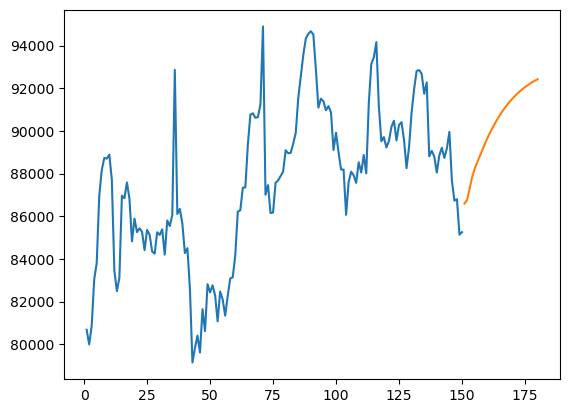

In [51]:
plt.plot(day_new,scaler.inverse_transform(df1[2604:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

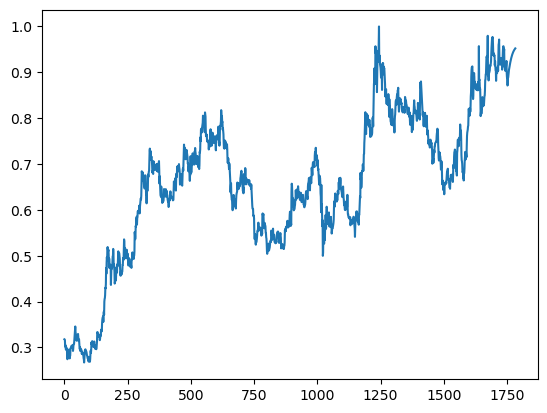

In [52]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])

In [53]:
df3=scaler.inverse_transform(df3).tolist()

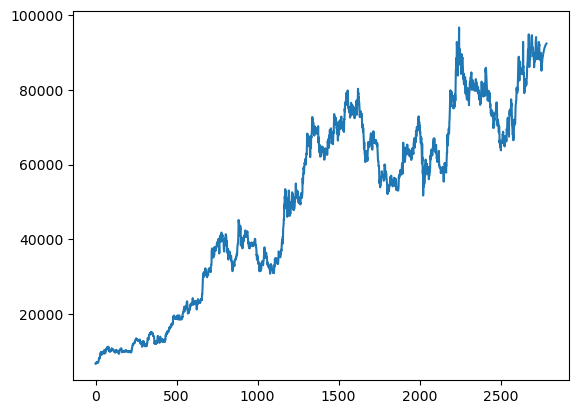

In [54]:
plt.plot(df3)

In [55]:
lst_output

[[0.8873857259750366],
 [0.8891921043395996],
 [0.8950157165527344],
 [0.9009183049201965],
 [0.9053768515586853],
 [0.9087806940078735],
 [0.9118905663490295],
 [0.9150394797325134],
 [0.9181739687919617],
 [0.9211560487747192],
 [0.9239301085472107],
 [0.9265156388282776],
 [0.928945004940033],
 [0.9312314987182617],
 [0.9333736300468445],
 [0.9353696703910828],
 [0.9372243881225586],
 [0.9389477968215942],
 [0.9405497312545776],
 [0.9420391917228699],
 [0.9434235095977783],
 [0.9447093605995178],
 [0.9459033608436584],
 [0.9470116496086121],
 [0.948040246963501],
 [0.9489947557449341],
 [0.9498802423477173],
 [0.9507015347480774],
 [0.9514631032943726],
 [0.9521693587303162]]

In [56]:
fore=scaler.inverse_transform(lst_output)
fore

array([[86597.43667425],
       [86759.83862719],
       [87283.40889081],
       [87814.079484  ],
       [88214.9239004 ],
       [88520.94542506],
       [88800.53764753],
       [89083.63984424],
       [89365.44522605],
       [89633.54831148],
       [89882.9493968 ],
       [90115.40078974],
       [90333.81228573],
       [90539.37888365],
       [90731.96661501],
       [90911.42007637],
       [91078.16796687],
       [91233.11055471],
       [91377.13203188],
       [91511.041568  ],
       [91635.49828802],
       [91751.10237073],
       [91858.4486362 ],
       [91958.08903456],
       [92050.5647985 ],
       [92136.37964949],
       [92215.98908039],
       [92289.82714908],
       [92358.29576099],
       [92421.79146284]])